In [ ]:
!wget https://raw.githubusercontent.com/keerthy456/AI_Bankmarketing_/main/AIphase1.csv

--2021-04-25 03:04:28--  https://raw.githubusercontent.com/keerthy456/AI_Bankmarketing_/main/AIphase1.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2733333 (2.6M) [text/plain]
Saving to: ‘AIphase1.csv’

AIphase1.csv        100%[===================>]   2.61M  --.-KB/s    in 0.08s   

2021-04-25 03:04:28 (31.6 MB/s) - ‘AIphase1.csv’ saved [2733333/2733333]



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

import random

data = pd.read_csv('AIphase1.csv',delimiter=",")

dataset = np.genfromtxt('AIphase1.csv',delimiter=',',skip_header=True)
np.set_printoptions(formatter={'float':'{:0.1f}'.format})
np.random.shuffle(dataset)
#loading data set
X = dataset[:,:-1]
Y = dataset[:,-1]

In [ ]:
max_array = []
min_array =[]
size = dataset.shape
column= size[1]
for i in range(column):
  min = dataset[:,i].min(axis=0)
  max = dataset[:,i].max(axis=0)
  max_array.append(max)
  min_array.append(min)
  dataset[:,i] = (dataset[:,i]-min)/(max-min)
X = dataset[:,:-1]
Y = dataset[:,-1]

In [ ]:

np.random.shuffle(dataset)

index = int(0.3*len(dataset[:,0]))
XVALID = X[:index]
YVALID = Y[:index]
XTRAIN = X[index:]
YTRAIN = Y[index:]

high = len(YVALID) - sum(YVALID)
print("Baseline accuracy : ",high/len(YVALID))

Baseline accuracy :  0.8937014248704663


Epoch 1/128
901/901 [==============================] - 2s 2ms/step - loss: 0.4630 - accuracy: 0.8137 - val_loss: 0.3154 - val_accuracy: 0.8910
Epoch 2/128
901/901 [==============================] - 1s 1ms/step - loss: 0.3241 - accuracy: 0.8823 - val_loss: 0.2941 - val_accuracy: 0.8911
Epoch 3/128
901/901 [==============================] - 1s 1ms/step - loss: 0.2951 - accuracy: 0.8874 - val_loss: 0.2824 - val_accuracy: 0.8924
Epoch 4/128
901/901 [==============================] - 1s 1ms/step - loss: 0.2848 - accuracy: 0.8882 - val_loss: 0.2754 - val_accuracy: 0.8960
Epoch 5/128
901/901 [==============================] - 1s 1ms/step - loss: 0.2768 - accuracy: 0.8942 - val_loss: 0.2702 - val_accuracy: 0.8993
Epoch 6/128
901/901 [==============================] - 1s 1ms/step - loss: 0.2765 - accuracy: 0.8941 - val_loss: 0.2656 - val_accuracy: 0.9001
Epoch 7/128
901/901 [==============================] - 1s 1ms/step - loss: 0.2671 - accuracy: 0.8975 - val_loss: 0.2616 - val_accuracy: 0.9011

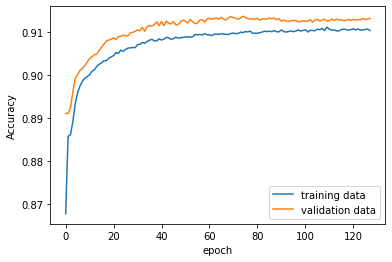

In [ ]:
#0.3
model1 = Sequential()
model1.add(Dense(1, input_dim = 20,activation='sigmoid'))
model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model1.fit(XTRAIN, YTRAIN, validation_data=(XVALID, YVALID), epochs=128)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()

In [ ]:
model_bst1 = Sequential()

Epoch 1/256
901/901 [==============================] - 2s 2ms/step - loss: 0.3780 - accuracy: 0.8598 - val_loss: 0.2668 - val_accuracy: 0.8959
Epoch 2/256
901/901 [==============================] - 1s 2ms/step - loss: 0.2687 - accuracy: 0.8926 - val_loss: 0.2243 - val_accuracy: 0.9118
Epoch 3/256
901/901 [==============================] - 1s 1ms/step - loss: 0.2246 - accuracy: 0.9078 - val_loss: 0.2050 - val_accuracy: 0.9128
Epoch 4/256
901/901 [==============================] - 1s 2ms/step - loss: 0.2098 - accuracy: 0.9092 - val_loss: 0.1942 - val_accuracy: 0.9156
Epoch 5/256
901/901 [==============================] - 1s 2ms/step - loss: 0.2069 - accuracy: 0.9105 - val_loss: 0.1920 - val_accuracy: 0.9162
Epoch 6/256
901/901 [==============================] - 1s 2ms/step - loss: 0.2035 - accuracy: 0.9110 - val_loss: 0.1903 - val_accuracy: 0.9154
Epoch 7/256
901/901 [==============================] - 1s 1ms/step - loss: 0.2098 - accuracy: 0.9075 - val_loss: 0.1888 - val_accuracy: 0.9156

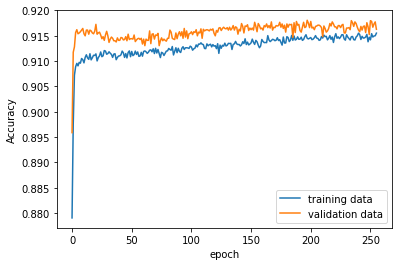

In [ ]:

model_bst1.add(Dense(8, input_dim = 20,activation='relu'))
model_bst1.add(Dense(4,activation='relu'))
model_bst1.add(Dense(1,activation='sigmoid'))
model_bst1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model_bst1.fit(XTRAIN, YTRAIN, validation_data=(XVALID, YVALID), epochs=256)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()

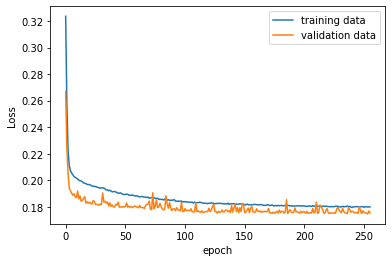

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='upper right')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
p = model_bst1.predict(XVALID)
accuracy = model_bst1.evaluate(XVALID, YVALID)
model_accuracy = accuracy_score(YVALID, p.round())

model_precision =  precision_score (YVALID, p.round())

recall_value = recall_score (YVALID, p.round())

model_flscore = f1_score(YVALID, p.round())

print("Accuracy Value: %.2f%%" % (model_accuracy))

print("Precision Value: %.2f%%" % (model_precision))

print("Recall Value: %.2f%%" % (recall_value))

print("Fl-score Value: %.2f\n" % (model_flscore))
model_bst1.summary()


386/386 [==============================] - 0s 948us/step - loss: 0.1754 - accuracy: 0.9163
Accuracy Value: 0.92%
Precision Value: 0.62%
Recall Value: 0.54%
Fl-score Value: 0.58

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 8)                 168       
_________________________________________________________________
dense_22 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 5         
Total params: 209
Trainable params: 209
Non-trainable params: 0
_________________________________________________________________


**Custom Function**

In [ ]:
def linear(x):
	return np.maximum(0, x)

# Sigmoid function
def sigmoidFunction(x):
    return 1 / (1 + np.exp(np.negative(x)))

def custom_model(model, validXData, validYData, display_weight=None):
    prediction = validXData
    layTotal = len(model.layers)

    for Num_lay, lay in enumerate(model.layers):
        weights = lay.get_weights()[0].T
        biases = lay.get_weights()[1].T
        if display_weight is not None:
            print("Layer #%s" %Num_lay)
            print("Weights:\n %s" % weights)
            print("Bias:\n %s\n" % biases)

        finalValue = []
        for row in prediction:
            value = []
            for i, w in enumerate(weights):                
                val = np.dot(w, row) + biases[i]
                value.append(val)

            if Num_lay < layTotal - 1:
                finalValue.append(linear(value))
            else:
                finalValue.append(sigmoidFunction(value))
            
        # Update new input value
        prediction = np.array(finalValue)

    accuracy = accuracy_score(validYData, prediction.round()) * 100.0
    precision = precision_score(validYData, prediction.round()) * 100.0
    recall = recall_score(validYData, prediction.round()) * 100.0
    f1score = f1_score(validYData, prediction.round()) * 100.0

    print("Accuracy: %.2f%%" % (accuracy))
    print("Precision: %.2f%%" % (precision))
    print("Recall: %.2f%%" % (recall))
    print("F1-score: %.2f\n" % (f1score))

    print("Custom Model Predicted Values")
    print("===============================================================")
    for i in range(5):
	    print("X=%s, Predicted=%s" % (validXData[i], prediction[i]))

    print("Keras Model Predicted Values") 
    print("========================================================================")
    for i in range(5):
	    print("X=%s, Y=%s" % (validXData[i], model_bst1.predict(validXData)[i]))
    
    print("Actual Xvalid Yvalid Values") 
    print("======================================================================")
    for i in range(5):
	    print("X=%s, Y=%s" % (validXData[i], validYData[i]))
    return prediction
custom_model(model_bst1,XVALID,YVALID,True)

Epoch 1/128
901/901 [==============================] - 2s 2ms/step - loss: 0.3310 - accuracy: 0.8478 - val_loss: 0.0142 - val_accuracy: 1.0000
Epoch 2/128
901/901 [==============================] - 1s 2ms/step - loss: 0.0080 - accuracy: 1.0000 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 3/128
901/901 [==============================] - 1s 2ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 4.9768e-04 - val_accuracy: 1.0000
Epoch 4/128
901/901 [==============================] - 1s 2ms/step - loss: 3.6628e-04 - accuracy: 1.0000 - val_loss: 2.0579e-04 - val_accuracy: 1.0000
Epoch 5/128
901/901 [==============================] - 1s 2ms/step - loss: 1.5237e-04 - accuracy: 1.0000 - val_loss: 9.9344e-05 - val_accuracy: 1.0000
Epoch 6/128
901/901 [==============================] - 1s 2ms/step - loss: 7.1829e-05 - accuracy: 1.0000 - val_loss: 5.2384e-05 - val_accuracy: 1.0000
Epoch 7/128
901/901 [==============================] - 1s 2ms/step - loss: 3.7422e-05 - accuracy: 1.0000 - val_los

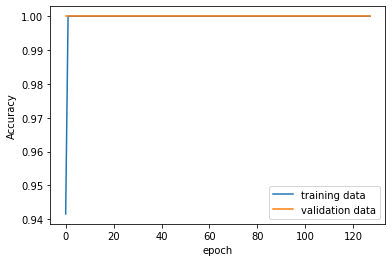

In [ ]:

max_array = []
min_array =[]
size = dataset.shape
column= size[1]
for i in range(column):
  min = dataset[:,i].min(axis=0)
  max = dataset[:,i].max(axis=0)
  max_array.append(max)
  min_array.append(min)
  dataset[:,i] = (dataset[:,i]-min)/(max-min)
X1 = dataset[:,:]
Y1 = dataset[:,-1]
#Data Spliting#Data Spliting
np.random.shuffle(dataset)

index = int(0.3*len(dataset[:,0]))
XVALID = X1[:index]
YVALID = Y1[:index]
XTRAIN = X1[index:]
YTRAIN = Y1[index:]

model_b = Sequential()
model_b.add(Dense(8, input_dim = 21,activation='relu'))
model_b.add(Dense(4,activation='relu'))
model_b.add(Dense(1,activation='sigmoid'))
model_b.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model_b.fit(XTRAIN, YTRAIN, validation_data=(XVALID, YVALID), epochs=128 )
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()


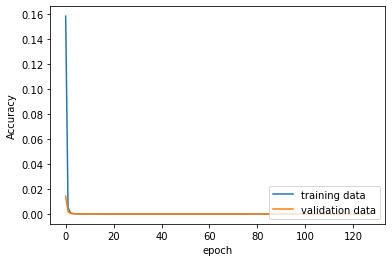

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()

Epoch 1/256
901/901 [==============================] - 2s 2ms/step - loss: 0.3372 - accuracy: 0.8847 - val_loss: 0.2668 - val_accuracy: 0.8927
Epoch 2/256
901/901 [==============================] - 2s 2ms/step - loss: 0.2721 - accuracy: 0.8915 - val_loss: 0.2410 - val_accuracy: 0.9074
Epoch 3/256
901/901 [==============================] - 2s 2ms/step - loss: 0.2379 - accuracy: 0.9047 - val_loss: 0.2121 - val_accuracy: 0.9123
Epoch 4/256
901/901 [==============================] - 1s 2ms/step - loss: 0.2176 - accuracy: 0.9097 - val_loss: 0.2051 - val_accuracy: 0.9136
Epoch 5/256
901/901 [==============================] - 2s 2ms/step - loss: 0.2113 - accuracy: 0.9103 - val_loss: 0.2014 - val_accuracy: 0.9153
Epoch 6/256
901/901 [==============================] - 1s 2ms/step - loss: 0.2115 - accuracy: 0.9110 - val_loss: 0.1969 - val_accuracy: 0.9152
Epoch 7/256
901/901 [==============================] - 1s 2ms/step - loss: 0.2041 - accuracy: 0.9107 - val_loss: 0.1982 - val_accuracy: 0.9155

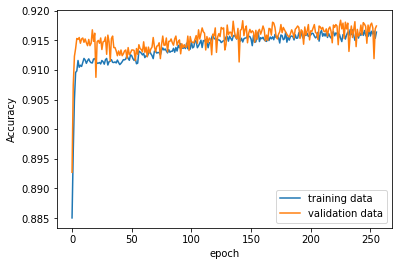

In [ ]:

model_b = Sequential()
model_b.add(Dense(8, input_dim = 20,activation='relu'))
model_b.add(Dense(4,activation='relu'))
model_b.add(Dense(1,activation='sigmoid'))
model_b.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model_b.fit(XTRAIN, YTRAIN, validation_data=(XVALID, YVALID), epochs=256 )
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()


Epoch 1/128
901/901 [==============================] - 2s 2ms/step - loss: 0.3754 - accuracy: 0.8815 - val_loss: 0.2724 - val_accuracy: 0.8957
Epoch 2/128
901/901 [==============================] - 1s 1ms/step - loss: 0.2708 - accuracy: 0.8950 - val_loss: 0.2319 - val_accuracy: 0.9042
Epoch 3/128
901/901 [==============================] - 1s 1ms/step - loss: 0.2368 - accuracy: 0.9034 - val_loss: 0.2151 - val_accuracy: 0.9131
Epoch 4/128
901/901 [==============================] - 1s 2ms/step - loss: 0.2189 - accuracy: 0.9081 - val_loss: 0.2054 - val_accuracy: 0.9134
Epoch 5/128
901/901 [==============================] - 1s 1ms/step - loss: 0.2121 - accuracy: 0.9091 - val_loss: 0.2021 - val_accuracy: 0.9134
Epoch 6/128
901/901 [==============================] - 1s 1ms/step - loss: 0.2033 - accuracy: 0.9131 - val_loss: 0.2015 - val_accuracy: 0.9124
Epoch 7/128
901/901 [==============================] - 1s 2ms/step - loss: 0.2042 - accuracy: 0.9104 - val_loss: 0.1989 - val_accuracy: 0.9143

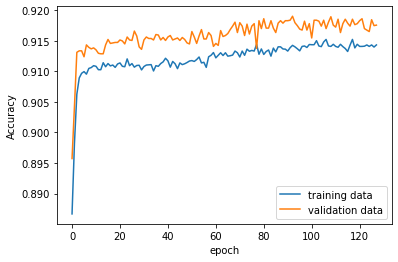

In [ ]:

model3 = Sequential()
model3.add(Dense(8, input_dim = 20,activation='relu'))
model3.add(Dense(4,activation='relu'))
model3.add(Dense(1,activation='sigmoid'))
model3.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model3.fit(XTRAIN, YTRAIN, validation_data=(XVALID, YVALID), epochs=128 )
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()


In [ ]:
model3.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 8)                 168       
_________________________________________________________________
dense_13 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 5         
Total params: 209
Trainable params: 209
Non-trainable params: 0
_________________________________________________________________


Epoch 1/256
961/961 [==============================] - 2s 2ms/step - loss: 0.4480 - accuracy: 0.7828 - val_loss: 0.2661 - val_accuracy: 0.8950

Epoch 00001: val_accuracy improved from -inf to 0.89500, saving model to model_es1.hdf5
Epoch 2/256
961/961 [==============================] - 2s 2ms/step - loss: 0.2714 - accuracy: 0.8919 - val_loss: 0.2250 - val_accuracy: 0.9118

Epoch 00002: val_accuracy improved from 0.89500 to 0.91176, saving model to model_es1.hdf5
Epoch 3/256
961/961 [==============================] - 2s 2ms/step - loss: 0.2273 - accuracy: 0.9068 - val_loss: 0.2069 - val_accuracy: 0.9145

Epoch 00003: val_accuracy improved from 0.91176 to 0.91451, saving model to model_es1.hdf5
Epoch 4/256
961/961 [==============================] - 2s 2ms/step - loss: 0.2234 - accuracy: 0.9031 - val_loss: 0.1976 - val_accuracy: 0.9160

Epoch 00004: val_accuracy improved from 0.91451 to 0.91597, saving model to model_es1.hdf5
Epoch 5/256
961/961 [==============================] - 2s 2ms/s

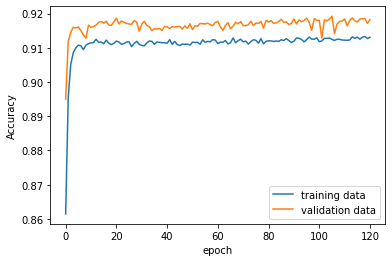

In [ ]:

model_es1 = Sequential()
model_es1.add(Dense(8, input_dim = 20,activation='relu'))
model_es1.add(Dense(4,activation='relu'))
model_es1.add(Dense(1,activation='sigmoid'))
model_es1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

callback_a = ModelCheckpoint(filepath = 'model_es1.hdf5', monitor='val_accuracy', save_best_only = True, save_weights_only = True, verbose = 1)
# The patience value can be 10, 20, 100, etc. depending on when your model starts to overfit
callback_b = EarlyStopping(monitor='val_accuracy', mode='min', patience=120, verbose=1)

history = model_es1.fit(XTRAIN, YTRAIN, validation_data=(XVALID, YVALID), epochs=256, batch_size=30, callbacks = [callback_a, callback_b])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()

Epoch 1/256
721/721 [==============================] - 2s 2ms/step - loss: 0.3324 - accuracy: 0.8857 - val_loss: 0.2816 - val_accuracy: 0.8928

Epoch 00001: val_accuracy improved from -inf to 0.89281, saving model to model_es.hdf5
Epoch 2/256
721/721 [==============================] - 1s 2ms/step - loss: 0.2888 - accuracy: 0.8866 - val_loss: 0.2576 - val_accuracy: 0.8969

Epoch 00002: val_accuracy improved from 0.89281 to 0.89694, saving model to model_es.hdf5
Epoch 3/256
721/721 [==============================] - 1s 2ms/step - loss: 0.2726 - accuracy: 0.8890 - val_loss: 0.2266 - val_accuracy: 0.9071

Epoch 00003: val_accuracy improved from 0.89694 to 0.90714, saving model to model_es.hdf5
Epoch 4/256
721/721 [==============================] - 1s 2ms/step - loss: 0.2326 - accuracy: 0.9030 - val_loss: 0.2043 - val_accuracy: 0.9134

Epoch 00004: val_accuracy improved from 0.90714 to 0.91337, saving model to model_es.hdf5
Epoch 5/256
721/721 [==============================] - 1s 2ms/step 

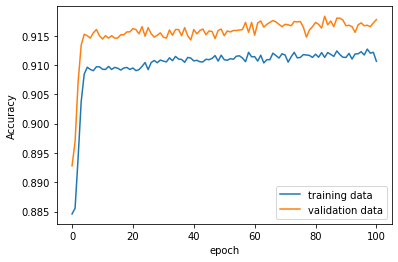

In [ ]:
#0.3
model_es = Sequential()
model_es.add(Dense(8, input_dim = 20,activation='relu'))
model_es.add(Dense(4,activation='relu'))
model_es.add(Dense(1,activation='sigmoid'))
model_es.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

callback_a = ModelCheckpoint(filepath = 'model_es.hdf5', monitor='val_accuracy', save_best_only = True, save_weights_only = True, verbose = 1)
# The patience value can be 10, 20, 100, etc. depending on when your model starts to overfit
callback_b = EarlyStopping(monitor='val_accuracy', mode='min', patience=100, verbose=1)

history = model_es.fit(XTRAIN, YTRAIN, validation_data=(XVALID, YVALID), epochs=256, batch_size=40, callbacks = [callback_a, callback_b])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_38 (Dense)             (None, 8)                 168       
_________________________________________________________________
dense_39 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_40 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_41 (Dense)             (None, 1)                 5         
Total params: 229
Trainable params: 229
Non-trainable params: 0
_________________________________________________________________
Epoch 1/512
901/901 [==============================] - 2s 2ms/step - loss: 0.4437 - accuracy: 0.8754 - val_loss: 0.2711 - val_accuracy: 0.9000
Epoch 2/512
901/901 [==============================] - 2s 2ms/step - loss: 0.2630 - accuracy: 0.9013 - val_los

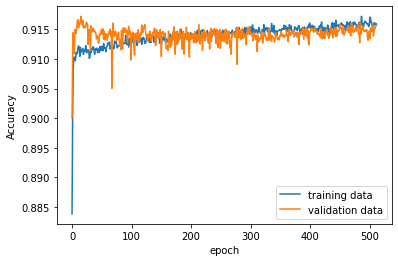

In [ ]:
model_5_ = Sequential()
model_5_.add(Dense(8, input_dim = 20,activation='relu'))
model_5_.add(Dense(4,activation='relu'))
model_5_.add(Dense(4,activation='relu'))
model_5_.add(Dense(1,activation='sigmoid'))
model_5_.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model_5_.summary()
history = model_5_.fit(XTRAIN, YTRAIN, validation_data=(XVALID, YVALID), epochs=512)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 8)                 168       
_________________________________________________________________
dense_29 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_30 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 5         
Total params: 229
Trainable params: 229
Non-trainable params: 0
_________________________________________________________________
Epoch 1/256
901/901 [==============================] - 2s 2ms/step - loss: 0.3876 - accuracy: 0.8834 - val_loss: 0.2625 - val_accuracy: 0.8910
Epoch 2/256
901/901 [==============================] - 1s 2ms/step - loss: 0.2615 - accuracy: 0.8864 - val_loss

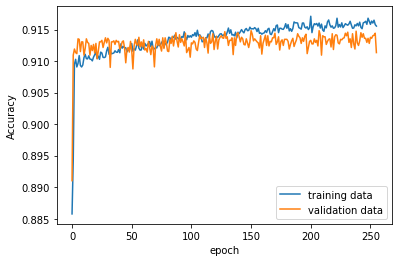

In [ ]:
model_5 = Sequential()
model_5.add(Dense(8, input_dim = 20,activation='relu'))
model_5.add(Dense(4,activation='relu'))
model_5.add(Dense(4,activation='relu'))
model_5.add(Dense(1,activation='sigmoid'))
model_5.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model_5.summary()
history = model_5.fit(XTRAIN, YTRAIN, validation_data=(XVALID, YVALID), epochs=256)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 8)                 168       
_________________________________________________________________
dense_16 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_17 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 5         
Total params: 229
Trainable params: 229
Non-trainable params: 0
_________________________________________________________________
Epoch 1/128
901/901 [==============================] - 2s 2ms/step - loss: 0.4105 - accuracy: 0.8506 - val_loss: 0.2543 - val_accuracy: 0.9025
Epoch 2/128
901/901 [==============================] - 1s 1ms/step - loss: 0.2489 - accuracy: 0.9014 - val_loss

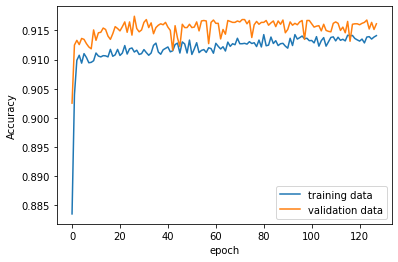

In [ ]:
#0.3
model5 = Sequential()
model5.add(Dense(8, input_dim = 20,activation='relu'))
model5.add(Dense(4,activation='relu'))
model5.add(Dense(4,activation='relu'))
model5.add(Dense(1,activation='sigmoid'))
model5.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model5.summary()
history = model5.fit(XTRAIN, YTRAIN, validation_data=(XVALID, YVALID), epochs=128)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 16)                336       
_________________________________________________________________
dense_26 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_27 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_28 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_29 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_30 (Dense)             (None, 1)                 5         
Total params: 553
Trainable params: 553
Non-trainable params: 0
________________________________________________________

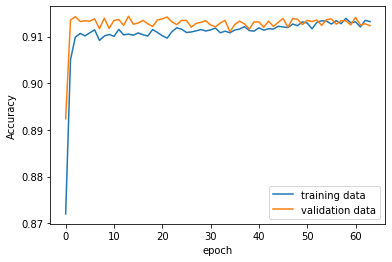

In [ ]:
#0.3
model6 = Sequential()
model6.add(Dense(16, input_dim = 20,activation='relu'))
model6.add(Dense(8,activation='relu'))
model6.add(Dense(4,activation='relu'))
model6.add(Dense(4,activation='relu'))
model6.add(Dense(4,activation='relu'))
model6.add(Dense(1,activation='sigmoid'))
model6.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model6.summary()
history = model6.fit(XTRAIN, YTRAIN, validation_data=(XVALID, YVALID), epochs=64)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()


Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 16)                336       
_________________________________________________________________
dense_38 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_39 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_40 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_41 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_42 (Dense)             (None, 1)                 5         
Total params: 553
Trainable params: 553
Non-trainable params: 0
_______________________________________________________

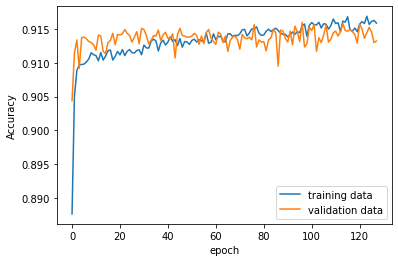

In [ ]:
#0.3
model7 = Sequential()
model7.add(Dense(16, input_dim = 20,activation='relu'))
model7.add(Dense(8,activation='relu'))
model7.add(Dense(4,activation='relu'))
model7.add(Dense(4,activation='relu'))
model7.add(Dense(4,activation='relu'))
model7.add(Dense(1,activation='sigmoid'))
model7.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model7.summary()
history = model7.fit(XTRAIN, YTRAIN, validation_data=(XVALID, YVALID), epochs=128)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()

Epoch 1/64
901/901 [==============================] - 2s 2ms/step - loss: 0.4442 - accuracy: 0.8781 - val_loss: 0.2640 - val_accuracy: 0.8957
Epoch 2/64
901/901 [==============================] - 1s 1ms/step - loss: 0.2691 - accuracy: 0.8901 - val_loss: 0.2035 - val_accuracy: 0.9124
Epoch 3/64
901/901 [==============================] - 1s 1ms/step - loss: 0.2151 - accuracy: 0.9088 - val_loss: 0.1953 - val_accuracy: 0.9141
Epoch 4/64
901/901 [==============================] - 1s 2ms/step - loss: 0.2025 - accuracy: 0.9102 - val_loss: 0.1938 - val_accuracy: 0.9145
Epoch 5/64
901/901 [==============================] - 1s 2ms/step - loss: 0.2030 - accuracy: 0.9102 - val_loss: 0.1921 - val_accuracy: 0.9143
Epoch 6/64
901/901 [==============================] - 1s 1ms/step - loss: 0.2052 - accuracy: 0.9091 - val_loss: 0.1924 - val_accuracy: 0.9147
Epoch 7/64
901/901 [==============================] - 1s 2ms/step - loss: 0.1989 - accuracy: 0.9126 - val_loss: 0.1901 - val_accuracy: 0.9153
Epoch 

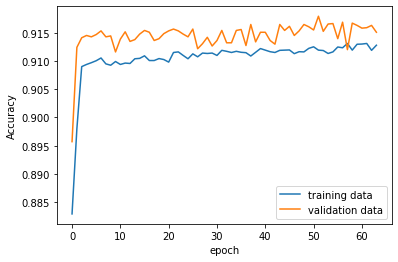

In [ ]:
#0.3
model8 = Sequential()
model8.add(Dense(16, input_dim = 20,activation='relu'))
model8.add(Dense(8,activation='relu'))
model8.add(Dense(4,activation='relu'))
model8.add(Dense(4,activation='relu'))
model8.add(Dense(4,activation='relu'))
model8.add(Dense(4,activation='relu'))
model8.add(Dense(4,activation='relu'))
model8.add(Dense(4,activation='relu'))
model8.add(Dense(1,activation='sigmoid'))
model8.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model8.fit(XTRAIN, YTRAIN, validation_data=(XVALID, YVALID), epochs=64)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()

Epoch 1/64
901/901 [==============================] - 3s 2ms/step - loss: 0.3343 - accuracy: 0.8849 - val_loss: 0.2040 - val_accuracy: 0.9114
Epoch 2/64
901/901 [==============================] - 2s 2ms/step - loss: 0.2147 - accuracy: 0.9085 - val_loss: 0.1950 - val_accuracy: 0.9146
Epoch 3/64
901/901 [==============================] - 2s 2ms/step - loss: 0.2056 - accuracy: 0.9111 - val_loss: 0.1986 - val_accuracy: 0.9107
Epoch 4/64
901/901 [==============================] - 2s 2ms/step - loss: 0.2030 - accuracy: 0.9100 - val_loss: 0.1875 - val_accuracy: 0.9147
Epoch 5/64
901/901 [==============================] - 2s 2ms/step - loss: 0.1947 - accuracy: 0.9117 - val_loss: 0.1884 - val_accuracy: 0.9105
Epoch 6/64
901/901 [==============================] - 2s 2ms/step - loss: 0.1958 - accuracy: 0.9127 - val_loss: 0.1831 - val_accuracy: 0.9130
Epoch 7/64
901/901 [==============================] - 2s 2ms/step - loss: 0.1907 - accuracy: 0.9110 - val_loss: 0.1901 - val_accuracy: 0.9121
Epoch 

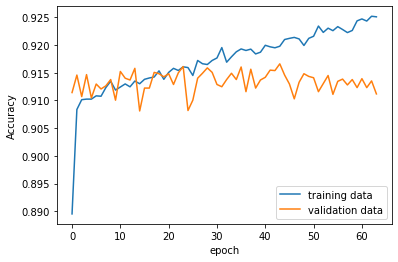

In [ ]:
model11 = Sequential()
model11.add(Dense(64, input_dim = 20,activation='relu'))
model11.add(Dense(32,activation='relu'))
model11.add(Dense(16,activation='relu'))
model11.add(Dense(8,activation='relu'))
model11.add(Dense(4,activation='relu'))
model11.add(Dense(1,activation='sigmoid'))
model11.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model11.fit(XTRAIN, YTRAIN, validation_data=(XVALID, YVALID), epochs=64)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()

Epoch 1/64
901/901 [==============================] - 2s 2ms/step - loss: 0.3130 - accuracy: 0.8896 - val_loss: 0.2250 - val_accuracy: 0.9100
Epoch 2/64
901/901 [==============================] - 1s 1ms/step - loss: 0.2249 - accuracy: 0.9063 - val_loss: 0.2057 - val_accuracy: 0.9145
Epoch 3/64
901/901 [==============================] - 1s 1ms/step - loss: 0.2170 - accuracy: 0.9049 - val_loss: 0.2043 - val_accuracy: 0.9127
Epoch 4/64
901/901 [==============================] - 1s 1ms/step - loss: 0.2101 - accuracy: 0.9077 - val_loss: 0.1971 - val_accuracy: 0.9153
Epoch 5/64
901/901 [==============================] - 1s 1ms/step - loss: 0.2086 - accuracy: 0.9081 - val_loss: 0.1965 - val_accuracy: 0.9164
Epoch 6/64
901/901 [==============================] - 1s 1ms/step - loss: 0.2013 - accuracy: 0.9111 - val_loss: 0.1920 - val_accuracy: 0.9141
Epoch 7/64
901/901 [==============================] - 1s 2ms/step - loss: 0.2019 - accuracy: 0.9112 - val_loss: 0.1926 - val_accuracy: 0.9144
Epoch 

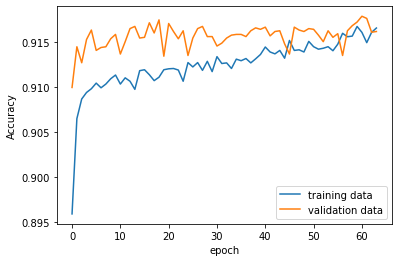

In [ ]:
model10 = Sequential()
model10.add(Dense(32, input_dim = 20,activation='relu'))
model10.add(Dense(8,activation='relu'))
model10.add(Dense(4,activation='relu'))
model10.add(Dense(1,activation='sigmoid'))
model10.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model10.fit(XTRAIN, YTRAIN, validation_data=(XVALID, YVALID), epochs=64)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()

Epoch 1/1024
901/901 [==============================] - 3s 2ms/step - loss: 0.9015 - accuracy: 0.8632 - val_loss: 0.2646 - val_accuracy: 0.8925
Epoch 2/1024
901/901 [==============================] - 2s 2ms/step - loss: 0.2786 - accuracy: 0.8857 - val_loss: 0.2506 - val_accuracy: 0.8926
Epoch 3/1024
901/901 [==============================] - 2s 2ms/step - loss: 0.2643 - accuracy: 0.8844 - val_loss: 0.2318 - val_accuracy: 0.9013
Epoch 4/1024
901/901 [==============================] - 2s 2ms/step - loss: 0.2433 - accuracy: 0.8966 - val_loss: 0.2112 - val_accuracy: 0.9054
Epoch 5/1024
901/901 [==============================] - 2s 2ms/step - loss: 0.2412 - accuracy: 0.8913 - val_loss: 0.2201 - val_accuracy: 0.8991
Epoch 6/1024
901/901 [==============================] - 2s 2ms/step - loss: 0.2281 - accuracy: 0.8960 - val_loss: 0.2054 - val_accuracy: 0.9021
Epoch 7/1024
901/901 [==============================] - 2s 2ms/step - loss: 0.2269 - accuracy: 0.8999 - val_loss: 0.2061 - val_accuracy:

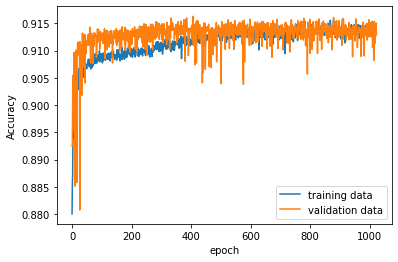

In [ ]:
model_o1 = Sequential()
model_o1.add(Dense(128, input_dim = 20,activation='relu'))
model_o1.add(Dense(64,activation='relu'))
model_o1.add(Dense(32,activation='relu'))
model_o1.add(Dense(16,activation='relu'))
model_o1.add(Dense(8,activation='relu'))
model_o1.add(Dense(4,activation='relu'))
model_o1.add(Dense(1,activation='sigmoid'))
model_o1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model_o1.fit(XTRAIN, YTRAIN, validation_data=(XVALID, YVALID), epochs=1024)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')

Epoch 1/1024
901/901 [==============================] - 3s 2ms/step - loss: 0.3220 - accuracy: 0.8835 - val_loss: 0.2106 - val_accuracy: 0.9114
Epoch 2/1024
901/901 [==============================] - 2s 2ms/step - loss: 0.2138 - accuracy: 0.9092 - val_loss: 0.2022 - val_accuracy: 0.9138
Epoch 3/1024
901/901 [==============================] - 2s 2ms/step - loss: 0.2084 - accuracy: 0.9095 - val_loss: 0.1912 - val_accuracy: 0.9148
Epoch 4/1024
901/901 [==============================] - 2s 2ms/step - loss: 0.2024 - accuracy: 0.9110 - val_loss: 0.1910 - val_accuracy: 0.9133
Epoch 5/1024
901/901 [==============================] - 2s 2ms/step - loss: 0.2013 - accuracy: 0.9070 - val_loss: 0.1881 - val_accuracy: 0.9147
Epoch 6/1024
901/901 [==============================] - 2s 2ms/step - loss: 0.1965 - accuracy: 0.9118 - val_loss: 0.1844 - val_accuracy: 0.9144
Epoch 7/1024
901/901 [==============================] - 2s 2ms/step - loss: 0.1973 - accuracy: 0.9086 - val_loss: 0.1853 - val_accuracy:

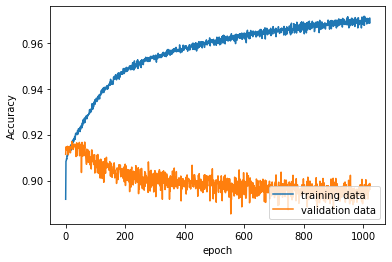

In [ ]:
model_o = Sequential()
model_o.add(Dense(64, input_dim = 20,activation='relu'))
model_o.add(Dense(32,activation='relu'))
model_o.add(Dense(16,activation='relu'))
model_o.add(Dense(8,activation='relu'))
model_o.add(Dense(4,activation='relu'))
model_o.add(Dense(1,activation='sigmoid'))
model_o.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model_o.fit(XTRAIN, YTRAIN, validation_data=(XVALID, YVALID), epochs=1024)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()

In [ ]:
#0.3
model_r_l = Sequential()
model_r_l.add(Dense(1, input_dim = 20,activation='sigmoid'))
model_r_l.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])
history = model_r_l.fit(XTRAIN, YTRAIN, validation_data=(XVALID, YVALID), epochs=256)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()

Epoch 1/256
901/901 [==============================] - 2s 2ms/step - loss: 0.3235 - accuracy: 0.8870 - val_loss: 0.2940 - val_accuracy: 0.8931
Epoch 2/256
901/901 [==============================] - 1s 1ms/step - loss: 0.3066 - accuracy: 0.8843 - val_loss: 0.2830 - val_accuracy: 0.8954
Epoch 3/256
901/901 [==============================] - 1s 1ms/step - loss: 0.2937 - accuracy: 0.8865 - val_loss: 0.2751 - val_accuracy: 0.8978
Epoch 4/256
901/901 [==============================] - 1s 1ms/step - loss: 0.2847 - accuracy: 0.8918 - val_loss: 0.2694 - val_accuracy: 0.9010
Epoch 5/256
901/901 [==============================] - 1s 2ms/step - loss: 0.2789 - accuracy: 0.8953 - val_loss: 0.2642 - val_accuracy: 0.9034
Epoch 6/256
901/901 [==============================] - 1s 2ms/step - loss: 0.2722 - accuracy: 0.8989 - val_loss: 0.2598 - val_accuracy: 0.9039
Epoch 7/256
901/901 [==============================] - 1s 1ms/step - loss: 0.2718 - accuracy: 0.8946 - val_loss: 0.2558 - val_accuracy: 0.9040

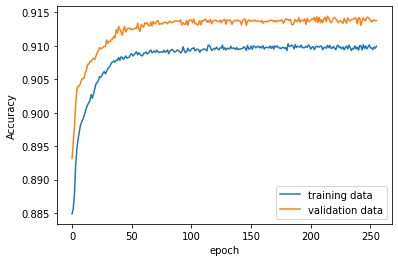

In [ ]:
#0.3
model = Sequential()
model.add(Dense(1, input_dim = 20,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(XTRAIN, YTRAIN, validation_data=(XVALID, YVALID), epochs=256)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()

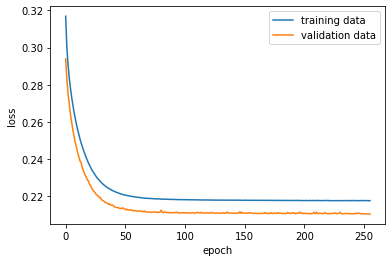

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='upper right')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
P = model.predict(XVALID)
accuracy = model.evaluate(XVALID, YVALID)

386/386 [==============================] - 0s 1ms/step - loss: 0.2106 - accuracy: 0.9138


Epoch 1/128
901/901 [==============================] - 2s 2ms/step - loss: 0.4393 - accuracy: 0.8835 - val_loss: 0.2941 - val_accuracy: 0.8931
Epoch 2/128
901/901 [==============================] - 1s 2ms/step - loss: 0.3027 - accuracy: 0.8853 - val_loss: 0.2786 - val_accuracy: 0.8931
Epoch 3/128
901/901 [==============================] - 1s 2ms/step - loss: 0.2892 - accuracy: 0.8847 - val_loss: 0.2695 - val_accuracy: 0.8991
Epoch 4/128
901/901 [==============================] - 1s 2ms/step - loss: 0.2809 - accuracy: 0.8925 - val_loss: 0.2618 - val_accuracy: 0.9039
Epoch 5/128
901/901 [==============================] - 1s 2ms/step - loss: 0.2696 - accuracy: 0.8957 - val_loss: 0.2509 - val_accuracy: 0.9048
Epoch 6/128
901/901 [==============================] - 1s 2ms/step - loss: 0.2603 - accuracy: 0.8986 - val_loss: 0.2394 - val_accuracy: 0.9069
Epoch 7/128
901/901 [==============================] - 1s 2ms/step - loss: 0.2538 - accuracy: 0.8989 - val_loss: 0.2285 - val_accuracy: 0.9080

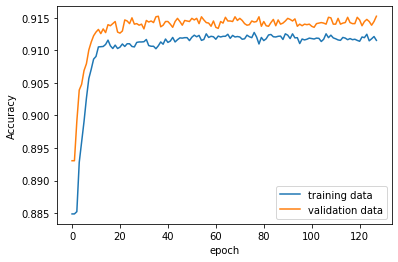

In [ ]:
#4-1
model_2_r = Sequential()
model_2_r.add(Dense(4, input_dim = 20,activation='relu'))
#model2.add(Dense(4,activation='relu'))
model_2_r.add(Dense(1,activation='sigmoid'))
model_2_r.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])
history = model_2_r.fit(XTRAIN, YTRAIN, validation_data=(XVALID, YVALID), epochs=128 )
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()

Epoch 1/128
901/901 [==============================] - 2s 2ms/step - loss: 0.3734 - accuracy: 0.8840 - val_loss: 0.2921 - val_accuracy: 0.8930
Epoch 2/128
901/901 [==============================] - 1s 1ms/step - loss: 0.2996 - accuracy: 0.8857 - val_loss: 0.2710 - val_accuracy: 0.8930
Epoch 3/128
901/901 [==============================] - 1s 1ms/step - loss: 0.2802 - accuracy: 0.8835 - val_loss: 0.2524 - val_accuracy: 0.8982
Epoch 4/128
901/901 [==============================] - 1s 1ms/step - loss: 0.2575 - accuracy: 0.8949 - val_loss: 0.2352 - val_accuracy: 0.9027
Epoch 5/128
901/901 [==============================] - 1s 2ms/step - loss: 0.2347 - accuracy: 0.9026 - val_loss: 0.2218 - val_accuracy: 0.9067
Epoch 6/128
901/901 [==============================] - 1s 1ms/step - loss: 0.2265 - accuracy: 0.9065 - val_loss: 0.2125 - val_accuracy: 0.9091
Epoch 7/128
901/901 [==============================] - 1s 1ms/step - loss: 0.2150 - accuracy: 0.9088 - val_loss: 0.2068 - val_accuracy: 0.9118

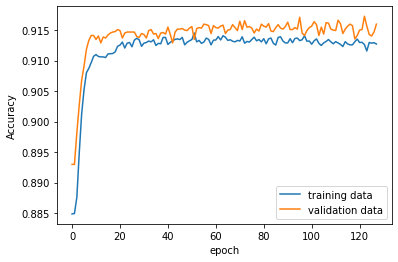

In [ ]:
#4-1
model_2 = Sequential()
model_2.add(Dense(4, input_dim = 20,activation='relu'))
#model2.add(Dense(4,activation='relu'))
model_2.add(Dense(1,activation='sigmoid'))
model_2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model_2.fit(XTRAIN, YTRAIN, validation_data=(XVALID, YVALID), epochs=128 )
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()


Epoch 1/128
1159/1159 [==============================] - 2s 1ms/step - loss: 0.6319 - accuracy: 0.7755 - val_loss: 0.4240 - val_accuracy: 0.8941
Epoch 2/128
1159/1159 [==============================] - 2s 1ms/step - loss: 0.3943 - accuracy: 0.8949 - val_loss: 0.3233 - val_accuracy: 0.9019
Epoch 3/128
1159/1159 [==============================] - 2s 1ms/step - loss: 0.3118 - accuracy: 0.9006 - val_loss: 0.2684 - val_accuracy: 0.9065
Epoch 4/128
1159/1159 [==============================] - 2s 1ms/step - loss: 0.2575 - accuracy: 0.9062 - val_loss: 0.2173 - val_accuracy: 0.9128
Epoch 5/128
1159/1159 [==============================] - 2s 1ms/step - loss: 0.2160 - accuracy: 0.9110 - val_loss: 0.2168 - val_accuracy: 0.9126
Epoch 6/128
1159/1159 [==============================] - 2s 1ms/step - loss: 0.2109 - accuracy: 0.9113 - val_loss: 0.2080 - val_accuracy: 0.9118
Epoch 7/128
1159/1159 [==============================] - 2s 1ms/step - loss: 0.2040 - accuracy: 0.9123 - val_loss: 0.2052 - val_ac

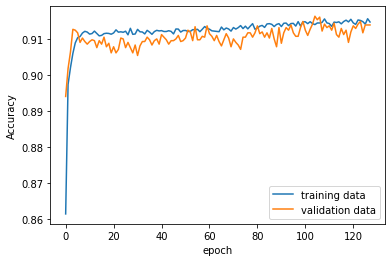

In [ ]:
#0.1
model2 = Sequential()
model2.add(Dense(8, input_dim = 20,activation='relu'))
model2.add(Dense(4,activation='relu'))
model2.add(Dense(1,activation='sigmoid'))
model2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model2.fit(XTRAIN, YTRAIN, validation_data=(XVALID, YVALID), epochs=128 )
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()



Epoch 1/128
1853/1853 [==============================] - 3s 1ms/step - loss: 0.4091 - accuracy: 0.8187 - val_loss: 0.2307 - val_accuracy: 0.9053
Epoch 2/128
1853/1853 [==============================] - 3s 1ms/step - loss: 0.2255 - accuracy: 0.9050 - val_loss: 0.2059 - val_accuracy: 0.9116
Epoch 3/128
1853/1853 [==============================] - 3s 1ms/step - loss: 0.2069 - accuracy: 0.9124 - val_loss: 0.2009 - val_accuracy: 0.9113
Epoch 4/128
1853/1853 [==============================] - 3s 1ms/step - loss: 0.2082 - accuracy: 0.9106 - val_loss: 0.2005 - val_accuracy: 0.9116
Epoch 5/128
1853/1853 [==============================] - 3s 1ms/step - loss: 0.2026 - accuracy: 0.9116 - val_loss: 0.1993 - val_accuracy: 0.9116
Epoch 6/128
1853/1853 [==============================] - 3s 1ms/step - loss: 0.2046 - accuracy: 0.9095 - val_loss: 0.1994 - val_accuracy: 0.9104
Epoch 7/128
1853/1853 [==============================] - 3s 1ms/step - loss: 0.2049 - accuracy: 0.9089 - val_loss: 0.2052 - val_ac

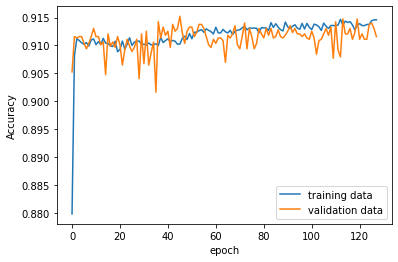

In [ ]:
#0.1
model4 = Sequential()
model4.add(Dense(8, input_dim = 20,activation='relu'))
model4.add(Dense(4,activation='relu'))
model4.add(Dense(4,activation='relu'))
model4.add(Dense(1,activation='sigmoid'))
model4.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model4.fit(XTRAIN, YTRAIN, validation_data=(XVALID, YVALID), epochs=128, batch_size=20)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()

Epoch 1/64
901/901 [==============================] - 2s 2ms/step - loss: 0.3576 - accuracy: 0.8772 - val_loss: 0.2707 - val_accuracy: 0.8973
Epoch 2/64
901/901 [==============================] - 1s 2ms/step - loss: 0.2679 - accuracy: 0.8979 - val_loss: 0.2282 - val_accuracy: 0.9096
Epoch 3/64
901/901 [==============================] - 1s 2ms/step - loss: 0.2283 - accuracy: 0.9070 - val_loss: 0.2124 - val_accuracy: 0.9133
Epoch 4/64
901/901 [==============================] - 1s 2ms/step - loss: 0.2167 - accuracy: 0.9077 - val_loss: 0.2078 - val_accuracy: 0.9136
Epoch 5/64
901/901 [==============================] - 1s 2ms/step - loss: 0.2112 - accuracy: 0.9099 - val_loss: 0.2055 - val_accuracy: 0.9131
Epoch 6/64
901/901 [==============================] - 1s 2ms/step - loss: 0.2072 - accuracy: 0.9114 - val_loss: 0.2067 - val_accuracy: 0.9137
Epoch 7/64
901/901 [==============================] - 1s 2ms/step - loss: 0.2033 - accuracy: 0.9131 - val_loss: 0.2036 - val_accuracy: 0.9134
Epoch 

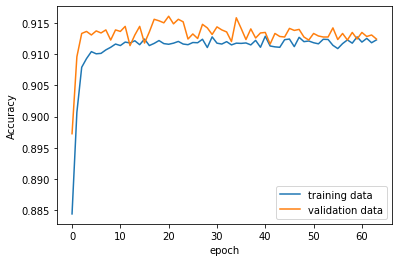

In [ ]:

model = Sequential()
model.add(Dense(8, input_dim = 20,activation='elu'))
model.add(Dense(4,activation='elu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(XTRAIN, YTRAIN, validation_data=(XVALID, YVALID), epochs=64)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_47 (Dense)             (None, 8)                 168       
_________________________________________________________________
dense_48 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_49 (Dense)             (None, 1)                 5         
Total params: 209
Trainable params: 209
Non-trainable params: 0
_________________________________________________________________
Epoch 1/512
901/901 [==============================] - 2s 2ms/step - loss: 0.4137 - accuracy: 0.8118 - val_loss: 0.2741 - val_accuracy: 0.9007
Epoch 2/512
901/901 [==============================] - 2s 2ms/step - loss: 0.2831 - accuracy: 0.8943 - val_loss: 0.2522 - val_accuracy: 0.9054
Epoch 3/512
901/901 [==============================] - 2s 2ms/step - loss: 0.2517 - accuracy: 0.900

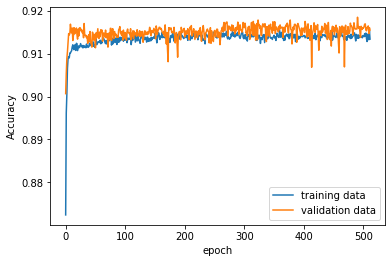

In [ ]:
model_r1 = Sequential()
model_r1.add(Dense(8, input_dim = 20,activation='relu'))
model_r1.add(Dense(4,activation='relu'))
model_r1.add(Dense(1,activation='sigmoid'))
model_r1.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])
model_r1.summary()
history = model_r1.fit(XTRAIN, YTRAIN, validation_data=(XVALID, YVALID), epochs=512)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_52 (Dense)             (None, 8)                 168       
_________________________________________________________________
dense_53 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_54 (Dense)             (None, 1)                 5         
Total params: 209
Trainable params: 209
Non-trainable params: 0
_________________________________________________________________
Epoch 1/256
901/901 [==============================] - 3s 2ms/step - loss: 0.4086 - accuracy: 0.8832 - val_loss: 0.2872 - val_accuracy: 0.8928
Epoch 2/256
901/901 [==============================] - 2s 2ms/step - loss: 0.2997 - accuracy: 0.8849 - val_loss: 0.2661 - val_accuracy: 0.9020
Epoch 3/256
901/901 [==============================] - 2s 2ms/step - loss: 0.2774 - accuracy: 0.895

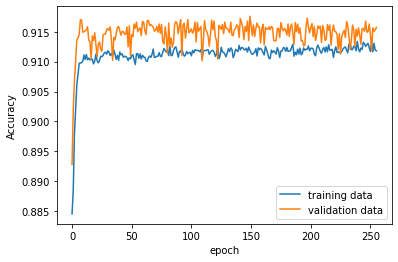

In [ ]:
model_r2 = Sequential()
model_r2.add(Dense(8, input_dim = 20,activation='relu'))
model_r2.add(Dense(4,activation='relu'))
model_r2.add(Dense(1,activation='sigmoid'))
model_r2.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])
model_r2.summary()
history = model_r2.fit(XTRAIN, YTRAIN, validation_data=(XVALID, YVALID), epochs=256)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 32)                672       
_________________________________________________________________
dense_35 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_36 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_37 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_38 (Dense)             (None, 1)                 5         
Total params: 1,377
Trainable params: 1,377
Non-trainable params: 0
_________________________________________________________________
Epoch 1/128
901/901 [==============================] - 2s 2ms/step - loss: 0.6158 - accuracy: 0.8512 - val_loss: 0.42

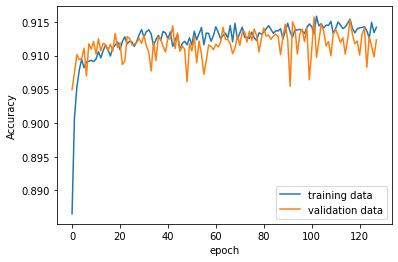

In [ ]:
model_r5 = Sequential()
model_r5.add(Dense(32, input_dim = 20,activation='relu'))
model_r5.add(Dense(16,activation='relu'))
model_r5.add(Dense(8,activation='relu'))
model_r5.add(Dense(4,activation='relu'))
model_r5.add(Dense(1,activation='sigmoid'))
model_r5.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])
model_r5.summary()
history = model_r5.fit(XTRAIN, YTRAIN, validation_data=(XVALID, YVALID), epochs=128)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()

Epoch 1/32
901/901 [==============================] - 2s 2ms/step - loss: 0.3704 - accuracy: 0.8466 - val_loss: 0.2323 - val_accuracy: 0.9079
Epoch 2/32
901/901 [==============================] - 2s 2ms/step - loss: 0.2217 - accuracy: 0.9090 - val_loss: 0.2020 - val_accuracy: 0.9132
Epoch 3/32
901/901 [==============================] - 2s 2ms/step - loss: 0.2083 - accuracy: 0.9081 - val_loss: 0.2045 - val_accuracy: 0.9081
Epoch 4/32
901/901 [==============================] - 2s 2ms/step - loss: 0.2034 - accuracy: 0.9091 - val_loss: 0.1988 - val_accuracy: 0.9122
Epoch 5/32
901/901 [==============================] - 2s 2ms/step - loss: 0.1921 - accuracy: 0.9117 - val_loss: 0.1916 - val_accuracy: 0.9151
Epoch 6/32
901/901 [==============================] - 2s 2ms/step - loss: 0.1998 - accuracy: 0.9099 - val_loss: 0.1949 - val_accuracy: 0.9139
Epoch 7/32
901/901 [==============================] - 2s 2ms/step - loss: 0.1972 - accuracy: 0.9099 - val_loss: 0.1903 - val_accuracy: 0.9129
Epoch 

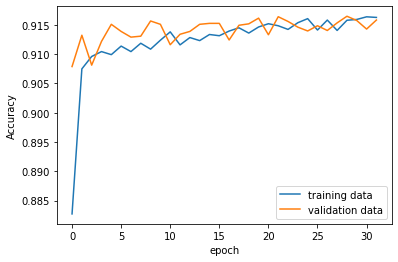

In [ ]:
#0.3
model_9 = Sequential()
model_9.add(Dense(32, input_dim = 20,activation='relu'))
model_9.add(Dense(16,activation='relu'))
model_9.add(Dense(8,activation='relu'))
model_9.add(Dense(4,activation='relu'))
model_9.add(Dense(1,activation='sigmoid'))
model_9.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model_9.fit(XTRAIN, YTRAIN, validation_data=(XVALID, YVALID), epochs=32)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 16)                336       
_________________________________________________________________
dense_14 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_15 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_16 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_17 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 5         
Total params: 553
Trainable params: 553
Non-trainable params: 0
________________________________________________________

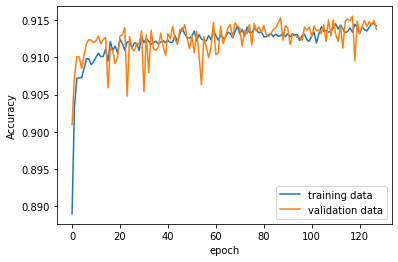

In [ ]:
model_r4 = Sequential()
model_r4.add(Dense(16, input_dim = 20,activation='relu'))
model_r4.add(Dense(8,activation='relu'))
model_r4.add(Dense(4,activation='relu'))
model_r4.add(Dense(4,activation='relu'))
model_r4.add(Dense(4,activation='relu'))
model_r4.add(Dense(1,activation='sigmoid'))
model_r4.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])
model_r4.summary()
history = model_r4.fit(XTRAIN, YTRAIN, validation_data=(XVALID, YVALID), epochs=128)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()

Epoch 1/64
901/901 [==============================] - 2s 2ms/step - loss: 1.8422 - accuracy: 0.8806 - val_loss: 1.6546 - val_accuracy: 0.8927
Epoch 2/64
901/901 [==============================] - 1s 2ms/step - loss: 1.8004 - accuracy: 0.8833 - val_loss: 1.6546 - val_accuracy: 0.8927
Epoch 3/64
901/901 [==============================] - 1s 2ms/step - loss: 1.8051 - accuracy: 0.8830 - val_loss: 1.6546 - val_accuracy: 0.8927
Epoch 4/64
901/901 [==============================] - 1s 2ms/step - loss: 1.7434 - accuracy: 0.8870 - val_loss: 1.6546 - val_accuracy: 0.8927
Epoch 5/64
901/901 [==============================] - 1s 2ms/step - loss: 1.7805 - accuracy: 0.8846 - val_loss: 1.6546 - val_accuracy: 0.8927
Epoch 6/64
901/901 [==============================] - 2s 2ms/step - loss: 1.7979 - accuracy: 0.8834 - val_loss: 1.6546 - val_accuracy: 0.8927
Epoch 7/64
901/901 [==============================] - 2s 2ms/step - loss: 1.8250 - accuracy: 0.8817 - val_loss: 1.6546 - val_accuracy: 0.8927
Epoch 

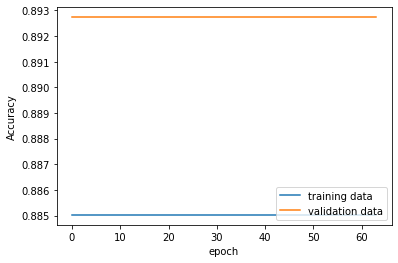

In [ ]:
model_l = Sequential()
model_l.add(Dense(8, input_dim = 20,activation='relu'))
model_l.add(Dense(4,activation='relu'))
model_l.add(Dense(1,activation='linear'))
model_l.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model_l.fit(XTRAIN, YTRAIN, validation_data=(XVALID, YVALID), epochs=64 )
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()

Epoch 1/64
901/901 [==============================] - 2s 2ms/step - loss: 0.5528 - accuracy: 0.8732 - val_loss: 0.2798 - val_accuracy: 0.8926
Epoch 2/64
901/901 [==============================] - 1s 2ms/step - loss: 0.3424 - accuracy: 0.8442 - val_loss: 0.4663 - val_accuracy: 0.8453
Epoch 3/64
901/901 [==============================] - 1s 2ms/step - loss: 0.4528 - accuracy: 0.8682 - val_loss: 0.3549 - val_accuracy: 0.8863
Epoch 4/64
901/901 [==============================] - 1s 2ms/step - loss: 0.3566 - accuracy: 0.8814 - val_loss: 0.3152 - val_accuracy: 0.8926
Epoch 5/64
901/901 [==============================] - 1s 2ms/step - loss: 0.3112 - accuracy: 0.8856 - val_loss: 0.2686 - val_accuracy: 0.8948
Epoch 6/64
901/901 [==============================] - 1s 2ms/step - loss: 0.3352 - accuracy: 0.8865 - val_loss: 0.2556 - val_accuracy: 0.8939
Epoch 7/64
901/901 [==============================] - 2s 2ms/step - loss: 0.3036 - accuracy: 0.8743 - val_loss: 0.3123 - val_accuracy: 0.8979
Epoch 

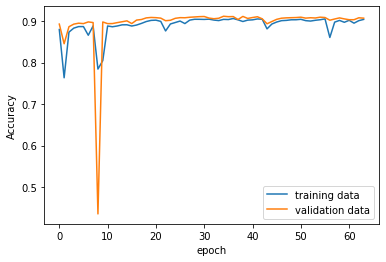

In [ ]:
model_all = Sequential()
model_all.add(Dense(8, input_dim = 20,activation='linear'))
model_all.add(Dense(4,activation='linear'))
model_all.add(Dense(1,activation='linear'))
model_all.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model_all.fit(XTRAIN, YTRAIN, validation_data=(XVALID, YVALID), epochs=64 )
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()

Epoch 1/64
901/901 [==============================] - 2s 2ms/step - loss: 2.4617 - accuracy: 0.6859 - val_loss: 0.3507 - val_accuracy: 0.8977
Epoch 2/64
901/901 [==============================] - 2s 2ms/step - loss: 0.3353 - accuracy: 0.8934 - val_loss: 0.2718 - val_accuracy: 0.9032
Epoch 3/64
901/901 [==============================] - 1s 2ms/step - loss: 0.2776 - accuracy: 0.8977 - val_loss: 0.2672 - val_accuracy: 0.9074
Epoch 4/64
901/901 [==============================] - 1s 2ms/step - loss: 0.2556 - accuracy: 0.9011 - val_loss: 0.2308 - val_accuracy: 0.9062
Epoch 5/64
901/901 [==============================] - 2s 2ms/step - loss: 0.2488 - accuracy: 0.9020 - val_loss: 0.2555 - val_accuracy: 0.9073
Epoch 6/64
901/901 [==============================] - 2s 2ms/step - loss: 0.2764 - accuracy: 0.8906 - val_loss: 0.2375 - val_accuracy: 0.9024
Epoch 7/64
901/901 [==============================] - 2s 2ms/step - loss: 0.2700 - accuracy: 0.8924 - val_loss: 0.2343 - val_accuracy: 0.9016
Epoch 

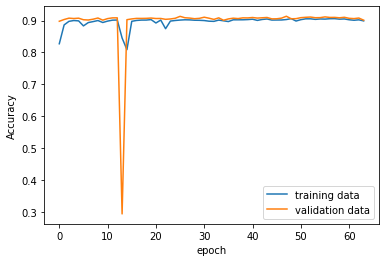

In [ ]:
model_all1 = Sequential()
model_all1.add(Dense(8, input_dim = 20,activation='linear'))
model_all1.add(Dense(4,activation='linear'))
model_all1.add(Dense(1,activation='linear'))
model_all1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model_all1.fit(XTRAIN, YTRAIN, validation_data=(XVALID, YVALID), epochs=64 )
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()

**Significance of Each feature**

In [ ]:
acc = []
index = int(0.3*len(dataset[:,0]))
for i in range(20):
  X = dataset[:,i]
  Y = dataset[:,-1]
  XVALID = X[:index]
  YVALID = Y[:index]
  XTRAIN = X[index:]
  YTRAIN = Y[index:]
  model1 = Sequential()
  model1.add(Dense(8, input_dim = 1,activation='relu'))
  model1.add(Dense(4,activation='relu'))
  model1.add(Dense(1,activation='sigmoid'))
  model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
  callback_a = ModelCheckpoint(filepath = 'model1.hdf5', monitor='val_accuracy', save_best_only = True, save_weights_only = True, verbose = 1)
  # The patience value can be 10, 20, 100, etc. depending on when your model starts to overfit
  callback_b = EarlyStopping(monitor='val_accuracy', mode='min', patience=40, verbose=1)
  history1 = model1.fit(XTRAIN, YTRAIN, validation_data=(XVALID, YVALID), epochs=64,batch_size = 30, callbacks=[callback_a,callback_b])
  model1.load_weights('model1.hdf5')
  p1 = model1.predict(XVALID)
  accuracy = model1.evaluate(XVALID, YVALID)
  acc.append(accuracy[1])


Epoch 1/64
961/961 [==============================] - 2s 2ms/step - loss: 0.6179 - accuracy: 0.8466 - val_loss: 0.4617 - val_accuracy: 0.8842

Epoch 00001: val_accuracy improved from -inf to 0.88423, saving model to model1.hdf5
Epoch 2/64
961/961 [==============================] - 2s 2ms/step - loss: 0.4332 - accuracy: 0.8869 - val_loss: 0.3846 - val_accuracy: 0.8842

Epoch 00002: val_accuracy did not improve from 0.88423
Epoch 3/64
961/961 [==============================] - 2s 2ms/step - loss: 0.3689 - accuracy: 0.8898 - val_loss: 0.3628 - val_accuracy: 0.8842

Epoch 00003: val_accuracy did not improve from 0.88423
Epoch 4/64
961/961 [==============================] - 2s 2ms/step - loss: 0.3571 - accuracy: 0.8864 - val_loss: 0.3568 - val_accuracy: 0.8842

Epoch 00004: val_accuracy did not improve from 0.88423
Epoch 5/64
961/961 [==============================] - 2s 2ms/step - loss: 0.3528 - accuracy: 0.8861 - val_loss: 0.3537 - val_accuracy: 0.8842

Epoch 00005: val_accuracy did not i

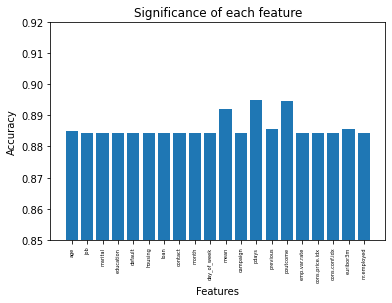

In [ ]:
column_names = data.columns
plt.bar(column_names[:20], acc)
plt.ylim(0.85,0.92)
plt.xlabel('Features', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.xticks(column_names[:20], fontsize=5, rotation=90)
plt.title('Significance of each feature')
plt.show()

**Removing One feature at a time**

In [ ]:
accuracy_r = [] 
index = int(0.3*len(dataset[:,0]))
for i in range(20):
  templist = np.delete(dataset,i,1)
  X = templist[:,:-1]
  Y = dataset[:,-1]
  XVALID = X[:index]
  YVALID = Y[:index]
  XTRAIN = X[index:]
  YTRAIN = Y[index:]
  model_r = Sequential()
  model_r.add(Dense(8, input_dim = 19, activation='relu'))
  model_r.add(Dense(4,activation='relu'))
  model_r.add(Dense(1,activation='sigmoid'))
  model_r.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
  callback_a = ModelCheckpoint(filepath = 'model_r.hdf5', monitor='val_accuracy', save_best_only = True, save_weights_only = True, verbose = 1)
  # The patience value can be 10, 20, 100, etc. depending on when your model starts to overfit
  callback_b = EarlyStopping(monitor='val_accuracy', mode='min', patience=64, verbose=1)
  history_r = model_r.fit(XTRAIN, YTRAIN, validation_data=(XVALID, YVALID), epochs=64, batch_size = 30, callbacks = [callback_a,callback_b])
  model_r.load_weights('model_r.hdf5')
  p_r = model_r.predict(XVALID)
  acc_r = model_r.evaluate(XVALID, YVALID)
  accuracy_r.append(acc_r[1])


Streaming output truncated to the last 5000 lines.
Epoch 36/64
961/961 [==============================] - 1s 2ms/step - loss: 0.1881 - accuracy: 0.9148 - val_loss: 0.2028 - val_accuracy: 0.9072

Epoch 00036: val_accuracy did not improve from 0.91176
Epoch 37/64
961/961 [==============================] - 2s 2ms/step - loss: 0.1872 - accuracy: 0.9140 - val_loss: 0.1924 - val_accuracy: 0.9116

Epoch 00037: val_accuracy did not improve from 0.91176
Epoch 38/64
961/961 [==============================] - 1s 2ms/step - loss: 0.1841 - accuracy: 0.9147 - val_loss: 0.1926 - val_accuracy: 0.9110

Epoch 00038: val_accuracy did not improve from 0.91176
Epoch 39/64
961/961 [==============================] - 2s 2ms/step - loss: 0.1932 - accuracy: 0.9124 - val_loss: 0.1926 - val_accuracy: 0.9099

Epoch 00039: val_accuracy did not improve from 0.91176
Epoch 40/64
961/961 [==============================] - 1s 2ms/step - loss: 0.1836 - accuracy: 0.9195 - val_loss: 0.1914 - val_accuracy: 0.9107

Epoch 000

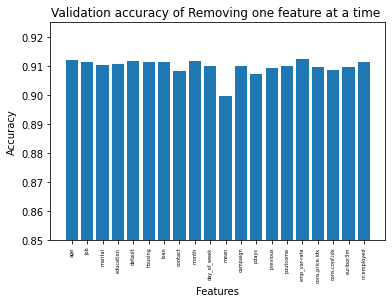

In [ ]:
column_names = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan','contact', 'month', 'day_of_week', 'mean', 'campaign', 'pdays','previous', 'poutcome', 'emp_var-rate', 'cons.price.idx','cons.conf.idx', 'euribor3m', 'nr.employed']
plt.bar(column_names, accuracy_r[:20])
plt.ylim(0.85,0.925)
plt.xlabel('Features', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.xticks(column_names[:20], fontsize=5, rotation=90)
plt.title('Validation accuracy of Removing one feature at a time ')
plt.show()


**Removing Features Iteratively**

In [ ]:
accuracy_2 = [] 
t = dataset.shape
index = int(0.3*len(dataset[:,0]))
for i in range(21):
  print()
  print(i)
  print()
  X  = dataset[:,i:-1]
  Y = dataset[:,-1]
  XVALID = X[:index]
  YVALID = Y[:index]
  XTRAIN = X[index:]
  YTRAIN = Y[index:]
  model_r1 = Sequential()
  model_r1.add(Dense(8, input_dim = t[1]-i-1, activation='relu'))
  model_r1.add(Dense(4,activation='relu'))
  model_r1.add(Dense(1,activation='sigmoid'))
  model_r1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
  callback_a = ModelCheckpoint(filepath = 'model_r1.hdf5', monitor='val_accuracy', save_best_only = True, save_weights_only = True, verbose = 1)
  # The patience value can be 10, 20, 100, etc. depending on when your model starts to overfit
  callback_b = EarlyStopping(monitor='val_accuracy', mode='min', patience=64, verbose=1)
  history_r1 = model_r1.fit(XTRAIN, YTRAIN, validation_data=(XVALID, YVALID), epochs=64, batch_size = 30, callbacks = [callback_a,callback_b])
  model_r1.load_weights('model_r1.hdf5')
  p_r1 = model_r1.predict(XVALID)
  acc_r1 = model_r1.evaluate(XVALID, YVALID)
  accuracy_2.append(acc_r1[1])


Streaming output truncated to the last 5000 lines.
961/961 [==============================] - 2s 2ms/step - loss: 0.1879 - accuracy: 0.9154 - val_loss: 0.1932 - val_accuracy: 0.9101

Epoch 00050: val_accuracy did not improve from 0.91240
Epoch 51/64
961/961 [==============================] - 2s 2ms/step - loss: 0.1882 - accuracy: 0.9139 - val_loss: 0.1911 - val_accuracy: 0.9106

Epoch 00051: val_accuracy did not improve from 0.91240
Epoch 52/64
961/961 [==============================] - 2s 2ms/step - loss: 0.1856 - accuracy: 0.9154 - val_loss: 0.1913 - val_accuracy: 0.9103

Epoch 00052: val_accuracy did not improve from 0.91240
Epoch 53/64
961/961 [==============================] - 2s 2ms/step - loss: 0.1848 - accuracy: 0.9163 - val_loss: 0.1996 - val_accuracy: 0.9080

Epoch 00053: val_accuracy did not improve from 0.91240
Epoch 54/64
961/961 [==============================] - 2s 2ms/step - loss: 0.1903 - accuracy: 0.9115 - val_loss: 0.1907 - val_accuracy: 0.9103

Epoch 00054: val_accu

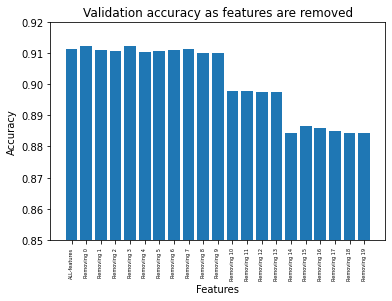

In [ ]:
column_names = ['ALL-features','Removing 0', 'Removing 1', 'Removing 2', 'Removing 3', 'Removing 4', 'Removing 5', 'Removing 6','Removing 7', 'Removing 8', 'Removing 9', 'Removing 10', 'Removing 11', 'Removing 12', 'Removing 13', 'Removing 14', 'Removing 15', 'Removing 16','Removing 17', 'Removing 18', 'Removing 19']
plt.bar(column_names[:21], accuracy_2)
plt.ylim(0.85,0.92)
plt.xlabel('Features', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.xticks(column_names[:21], fontsize=5, rotation=90)
plt.title('Validation accuracy as features are removed')
plt.show()

**Removing Least-2 significant Features**

In [ ]:
t = np.delete(dataset,1,1)
t = np.delete(t,1,1)
index = int(0.3*len(dataset[:,0]))
X  = t[:,:-1]
Y = dataset[:,-1]
XVALID = X[:index]
YVALID = Y[:index]
XTRAIN = X[index:]
YTRAIN = Y[index:]
model_r2 = Sequential()
model_r2.add(Dense(8, input_dim = 18, activation='relu'))
model_r2.add(Dense(4,activation='relu'))
model_r2.add(Dense(1,activation='sigmoid'))
model_r2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
callback_a = ModelCheckpoint(filepath = 'model_r2.hdf5', monitor='val_accuracy', save_best_only = True, save_weights_only = True, verbose = 1)
  # The patience value can be 10, 20, 100, etc. depending on when your model starts to overfit
callback_b = EarlyStopping(monitor='val_accuracy', mode='min', patience=64, verbose=1)
history_r2 = model_r2.fit(XTRAIN, YTRAIN, validation_data=(XVALID, YVALID), epochs=64, batch_size = 40, callbacks = [callback_a,callback_b])
model_r2.load_weights('model_r2.hdf5')
p_r2 = model_r2.predict(XVALID)
acc_r2 = model_r2.evaluate(XVALID, YVALID)
accuracy_3.append(acc_r2[1])


Epoch 1/64
721/721 [==============================] - 2s 2ms/step - loss: 0.4116 - accuracy: 0.8594 - val_loss: 0.2835 - val_accuracy: 0.8973

Epoch 00001: val_accuracy improved from -inf to 0.89726, saving model to model_r2.hdf5
Epoch 2/64
721/721 [==============================] - 1s 2ms/step - loss: 0.2712 - accuracy: 0.9007 - val_loss: 0.2590 - val_accuracy: 0.9014

Epoch 00002: val_accuracy improved from 0.89726 to 0.90139, saving model to model_r2.hdf5
Epoch 3/64
721/721 [==============================] - 1s 2ms/step - loss: 0.2442 - accuracy: 0.9052 - val_loss: 0.2344 - val_accuracy: 0.9058

Epoch 00003: val_accuracy improved from 0.90139 to 0.90585, saving model to model_r2.hdf5
Epoch 4/64
721/721 [==============================] - 1s 2ms/step - loss: 0.2242 - accuracy: 0.9089 - val_loss: 0.2217 - val_accuracy: 0.9072

Epoch 00004: val_accuracy improved from 0.90585 to 0.90722, saving model to model_r2.hdf5
Epoch 5/64
721/721 [==============================] - 1s 2ms/step - los

**Removing Least-3 significant Features**

In [ ]:
t = np.delete(dataset,1,1)
t = np.delete(t,1,1)
t = np.delete(t,1,1)
index = int(0.3*len(dataset[:,0]))
X  = t[:,:-1]
Y = dataset[:,-1]
XVALID = X[:index]
YVALID = Y[:index]
XTRAIN = X[index:]
YTRAIN = Y[index:]
model_r3 = Sequential()
model_r3.add(Dense(8, input_dim = 17, activation='relu'))
model_r3.add(Dense(4,activation='relu'))
model_r3.add(Dense(1,activation='sigmoid'))
model_r3.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
callback_a = ModelCheckpoint(filepath = 'model_r3.hdf5', monitor='val_accuracy', save_best_only = True, save_weights_only = True, verbose = 1)
  # The patience value can be 10, 20, 100, etc. depending on when your model starts to overfit
callback_b = EarlyStopping(monitor='val_accuracy', mode='min', patience=64, verbose=1)
history_r3 = model_r3.fit(XTRAIN, YTRAIN, validation_data=(XVALID, YVALID), epochs=64, batch_size = 40, callbacks = [callback_a,callback_b])
model_r3.load_weights('model_r3.hdf5')
p_r3 = model_r3.predict(XVALID)
acc_r3 = model_r3.evaluate(XVALID, YVALID)



Epoch 1/64
721/721 [==============================] - 2s 2ms/step - loss: 0.3816 - accuracy: 0.8893 - val_loss: 0.2892 - val_accuracy: 0.8850

Epoch 00001: val_accuracy improved from -inf to 0.88496, saving model to model_r3.hdf5
Epoch 2/64
721/721 [==============================] - 1s 2ms/step - loss: 0.2822 - accuracy: 0.8909 - val_loss: 0.2611 - val_accuracy: 0.9005

Epoch 00002: val_accuracy improved from 0.88496 to 0.90050, saving model to model_r3.hdf5
Epoch 3/64
721/721 [==============================] - 1s 2ms/step - loss: 0.2473 - accuracy: 0.9021 - val_loss: 0.2321 - val_accuracy: 0.9057

Epoch 00003: val_accuracy improved from 0.90050 to 0.90568, saving model to model_r3.hdf5
Epoch 4/64
721/721 [==============================] - 1s 2ms/step - loss: 0.2238 - accuracy: 0.9079 - val_loss: 0.2219 - val_accuracy: 0.9069

Epoch 00004: val_accuracy improved from 0.90568 to 0.90690, saving model to model_r3.hdf5
Epoch 5/64
721/721 [==============================] - 1s 2ms/step - los



**Removing Least-4 significant Features**

In [ ]:
t = np.delete(dataset,1,1)
t = np.delete(t,1,1)
t = np.delete(t,1,1)
t = np.delete(t,1,1)
index = int(0.3*len(dataset[:,0]))
X  = t[:,:-1]
Y = dataset[:,-1]
XVALID = X[:index]
YVALID = Y[:index]
XTRAIN = X[index:]
YTRAIN = Y[index:]
model_r4 = Sequential()
model_r4.add(Dense(8, input_dim = 16, activation='relu'))
model_r4.add(Dense(4,activation='relu'))
model_r4.add(Dense(1,activation='sigmoid'))
model_r4.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
callback_a = ModelCheckpoint(filepath = 'model_r4.hdf5', monitor='val_accuracy', save_best_only = True, save_weights_only = True, verbose = 1)
  # The patience value can be 10, 20, 100, etc. depending on when your model starts to overfit
callback_b = EarlyStopping(monitor='val_accuracy', mode='min', patience=64, verbose=1)
history_r4 = model_r4.fit(XTRAIN, YTRAIN, validation_data=(XVALID, YVALID), epochs=64, batch_size = 40, callbacks = [callback_a,callback_b])
model_r4.load_weights('model_r4.hdf5')
p_r4 = model_r4.predict(XVALID)
acc_r4 = model_r4.evaluate(XVALID, YVALID)



Epoch 1/64
721/721 [==============================] - 2s 2ms/step - loss: 0.4426 - accuracy: 0.8474 - val_loss: 0.2893 - val_accuracy: 0.8842

Epoch 00001: val_accuracy improved from -inf to 0.88423, saving model to model_r4.hdf5
Epoch 2/64
721/721 [==============================] - 1s 2ms/step - loss: 0.2787 - accuracy: 0.8877 - val_loss: 0.2603 - val_accuracy: 0.8842

Epoch 00002: val_accuracy did not improve from 0.88423
Epoch 3/64
721/721 [==============================] - 1s 2ms/step - loss: 0.2466 - accuracy: 0.8906 - val_loss: 0.2358 - val_accuracy: 0.9051

Epoch 00003: val_accuracy improved from 0.88423 to 0.90512, saving model to model_r4.hdf5
Epoch 4/64
721/721 [==============================] - 1s 2ms/step - loss: 0.2260 - accuracy: 0.9071 - val_loss: 0.2212 - val_accuracy: 0.9080

Epoch 00004: val_accuracy improved from 0.90512 to 0.90795, saving model to model_r4.hdf5
Epoch 5/64
721/721 [==============================] - 1s 2ms/step - loss: 0.2117 - accuracy: 0.9130 - val_

**Removing Least-5 significant Features**

In [ ]:
t = np.delete(dataset,1,1)
t = np.delete(t,1,1)
t = np.delete(t,1,1)
t = np.delete(t,1,1)
t = np.delete(t,1,1)
index = int(0.3*len(dataset[:,0]))
X  = t[:,:-1]
Y = dataset[:,-1]
XVALID = X[:index]
YVALID = Y[:index]
XTRAIN = X[index:]
YTRAIN = Y[index:]
model_r5 = Sequential()
model_r5.add(Dense(8, input_dim = 15, activation='relu'))
model_r5.add(Dense(4,activation='relu'))
model_r5.add(Dense(1,activation='sigmoid'))
model_r5.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
callback_a = ModelCheckpoint(filepath = 'model_r5.hdf5', monitor='val_accuracy', save_best_only = True, save_weights_only = True, verbose = 1)
  # The patience value can be 10, 20, 100, etc. depending on when your model starts to overfit
callback_b = EarlyStopping(monitor='val_accuracy', mode='min', patience=64, verbose=1)
history_r5 = model_r5.fit(XTRAIN, YTRAIN, validation_data=(XVALID, YVALID), epochs=64, batch_size = 40, callbacks = [callback_a,callback_b])
model_r5.load_weights('model_r5.hdf5')
p_r5 = model_r5.predict(XVALID)
acc_r5 = model_r5.evaluate(XVALID, YVALID)



Epoch 1/64
721/721 [==============================] - 2s 2ms/step - loss: 0.5280 - accuracy: 0.7619 - val_loss: 0.2885 - val_accuracy: 0.8862

Epoch 00001: val_accuracy improved from -inf to 0.88617, saving model to model_r5.hdf5
Epoch 2/64
721/721 [==============================] - 1s 2ms/step - loss: 0.2727 - accuracy: 0.8979 - val_loss: 0.2575 - val_accuracy: 0.9007

Epoch 00002: val_accuracy improved from 0.88617 to 0.90074, saving model to model_r5.hdf5
Epoch 3/64
721/721 [==============================] - 1s 2ms/step - loss: 0.2458 - accuracy: 0.9047 - val_loss: 0.2360 - val_accuracy: 0.9048

Epoch 00003: val_accuracy improved from 0.90074 to 0.90479, saving model to model_r5.hdf5
Epoch 4/64
721/721 [==============================] - 1s 2ms/step - loss: 0.2298 - accuracy: 0.9083 - val_loss: 0.2258 - val_accuracy: 0.9067

Epoch 00004: val_accuracy improved from 0.90479 to 0.90665, saving model to model_r5.hdf5
Epoch 5/64
721/721 [==============================] - 1s 2ms/step - los

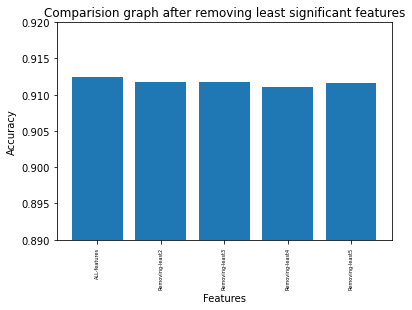

In [ ]:
column_names = ['ALL-features','Removing-least2','Removing-least3','Removing-least4','Removing-least5']
accuracies = []
accuracies.append(accuracy_2[1])
accuracies.append(acc_r2[1])
accuracies.append(acc_r3[1])
accuracies.append(acc_r4[1])
accuracies.append(acc_r5[1])
plt.bar(column_names, accuracies)
plt.ylim(0.89,0.92)
plt.xlabel('Features', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.xticks(column_names, fontsize=5, rotation=90)
plt.title('Comparision graph after removing least significant features')
plt.show()